# NEWLAND THE CITY OF THE FUTURE - Group 36

Welcome to Newland. In 2044, planet Earth was going through significant and accelerated climate
changes that became unfeasible for all forms of life.

The mission, called "Newland", was launched in 2046, and sent 3 populated spaceships, each with a
capacity of about 40,000 people, to the new planet.

In 2048, and with another 100 new spaceships on the way (where the selection criteria remains
controversial), the Newland government decided that residents should start paying taxes in order to make
the new city more financially sustainable.

Several groups of data scientists (including your group) were invited to create a predictive model based
on a dataset of 22400 observations. This model will be applied to 10100 new observations (the test
dataset) from which the government knows the value of income.


**Some of the models uploaded on kaggle were experimental and are not included in this notebook.**

# Import libraries and remove warnings

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from math import ceil
import time
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [218]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

Requirement already up-to-date: imbalanced-learn in c:\users\pt98p\anaconda3\lib\site-packages (0.7.0)


In [219]:
!pip install graphviz

# install python-graphviz
!pip install pydotplus
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=X_train.columns,  
                               class_names=["0", "1"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())


# Load Train Dataset

In [220]:
train = pd.read_excel('Train.xlsx')

In [221]:
train.head(5)

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


# Descriptive Statistics

In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
dtypes:

In [223]:
train.describe()

,CITIZEN_ID,Years of Education,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,23685.500000,13.173884,40.483795,1324.915357,109.145313,0.237098
std,6466.467351,2.512451,12.370921,9227.771813,500.208904,0.425313
min,12486.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,18085.750000,12.000000,40.000000,0.000000,0.000000,0.000000
50%,23685.500000,13.000000,40.000000,0.000000,0.000000,0.000000
75%,29285.250000,15.000000,45.000000,0.000000,0.000000,0.000000
max,34885.000000,21.000000,99.000000,122999.000000,5358.000000,1.000000


# FeatureTransformation / Data Cleaning

In [224]:
train.duplicated().sum()

0

In [225]:
train.replace("", np.nan, inplace=True)
train.replace("?", np.nan, inplace=True)
train.isna().sum()

CITIZEN_ID                   0
Name                         0
Birthday                     0
Native Continent             0
Marital Status               0
Lives with                   0
Base Area                  395
Education Level              0
Years of Education           0
Employment Sector         1264
Role                      1271
Working Hours per week       0
Money Received               0
Ticket Price                 0
Income                       0
dtype: int64

In [226]:
train.Role.fillna(train.Role.mode().loc[0], inplace=True)
train['Employment Sector'].fillna(train['Employment Sector'].mode().loc[0], inplace=True)
train['Base Area'].fillna(train['Base Area'].mode().loc[0], inplace=True)
train.isna().sum()

CITIZEN_ID                0
Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
Income                    0
dtype: int64

We tried to run KNNImputer to replace the missing values, but our final model was better with the replacement with the mode of each variable with missing values.

In [227]:
#instantiate both packages to use
#encoder = OrdinalEncoder()
#imputer = KNN()
# create a list of categorical columns to iterate over
#cat_cols = ['Role','Base Area','Employment Sector']

#def encode(data):
    #'''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    #nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    #impute_reshape = nonulls.reshape(-1,1)
    #encode date
    #impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    #data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    #return data

#create a for loop to iterate through each column in the data
#for columns in cat_cols:
    #encode(train[columns])

#encode_data = pd.DataFrame(imputer.fit_transform(train),columns = train.columns)

Computing the log of some numeric variables, but we decided not to use them because of the final results.

In [228]:
#train['logYearsEduc'] = np.log(train['Years of Education'])
#train['logWorkinghours'] = np.log(train['Working Hours per week'])
#train.drop('Working Hours per week',axis=1,inplace=True)
#train['logMoneyReceived'] = np.log(train['Money Received'])
#train['logTicketPrice'] = np.log(train['Ticket Price'])

Creating a variable gender from the titles of each citizen.

In [229]:
lista_names = []
for n in range(len(train)):
    if 'Mr' in train['Name'][n]:
        lista_names.append(1)
    else:
        lista_names.append(0)
        
train['Gender'] = lista_names
train.drop('Name',axis=1,inplace=True)

Creating a variable age from the variable date of birth.

In [230]:
bissexto=train[train["Birthday"].str.contains("February 29")]
listbiss=np.arange(1920, 2048, 4).tolist()
listbiss=map(str,listbiss)
bissexto["ano"]=bissexto["Birthday"].astype(str).str[-4:]
bissexto=bissexto[~bissexto["ano"].isin(listbiss)]
lis=bissexto.index
for i in lis:
    train["Birthday"][i]=train["Birthday"][i].replace("29","28")
from datetime import datetime
for i in train.index:
    train["Birthday"][i]=datetime.strptime(train["Birthday"][i], ' %B %d,%Y')
train["Birthday"] =  pd.to_datetime(train["Birthday"])
train['Birthday'] = (datetime.strptime(" January 01,2048",' %B %d,%Y') - train['Birthday'])/np.timedelta64(1, 'Y')
train["Birthday"]=train["Birthday"].apply(np.floor)
train["Birthday"]=train["Birthday"].astype(int)
train.rename(columns={"Birthday": "Age"},inplace = True)

Creating a variable type_of_traveller which will have the values ('A','B','C') according to the instructions on the project description.

In [231]:
lista_tipos = []

for i in range(len(train['Money Received'])):
    if train['Money Received'][i] == 0:
        if train['Ticket Price'][i] == 0:
            lista_tipos.append('A')
        if train['Ticket Price'][i] > 0:
            lista_tipos.append('C')
    else:
        lista_tipos.append('B')
train['type_of_traveller'] = lista_tipos

The Citizen_ID is a unique identifier for each Citizen of Newland. This means that it will not add information to the model.
In this sense, I will remove it from the datasets. And save it as index to create the csv files.

In [232]:
train = train.set_index('CITIZEN_ID')

In [233]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22400 entries, 12486 to 34885
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     22400 non-null  int32 
 1   Native Continent        22400 non-null  object
 2   Marital Status          22400 non-null  object
 3   Lives with              22400 non-null  object
 4   Base Area               22400 non-null  object
 5   Education Level         22400 non-null  object
 6   Years of Education      22400 non-null  int64 
 7   Employment Sector       22400 non-null  object
 8   Role                    22400 non-null  object
 9   Working Hours per week  22400 non-null  int64 
 10  Money Received          22400 non-null  int64 
 11  Ticket Price            22400 non-null  int64 
 12  Income                  22400 non-null  int64 
 13  Gender                  22400 non-null  int64 
 14  type_of_traveller       22400 non-null  object
dty

In [234]:
train.describe()

,Age,Years of Education,Working Hours per week,Money Received,Ticket Price,Income,Gender
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,37.586429,13.173884,40.483795,1324.915357,109.145313,0.237098,0.852143
std,13.652454,2.512451,12.370921,9227.771813,500.208904,0.425313,0.354966
min,16.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,12.000000,40.000000,0.000000,0.000000,0.000000,1.000000
50%,36.000000,13.000000,40.000000,0.000000,0.000000,0.000000,1.000000
75%,47.000000,15.000000,45.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,21.000000,99.000000,122999.000000,5358.000000,1.000000,1.000000


Separating our categorical variables and non categorical variables in 2 different set of variables.

In [235]:
non_metric_features = ["Native Continent", "Marital Status", "Lives with", "Employment Sector",'Role','Base Area','Education Level','type_of_traveller']
metric_features = train.columns.drop(non_metric_features).to_list()

# Visualization/Correlations

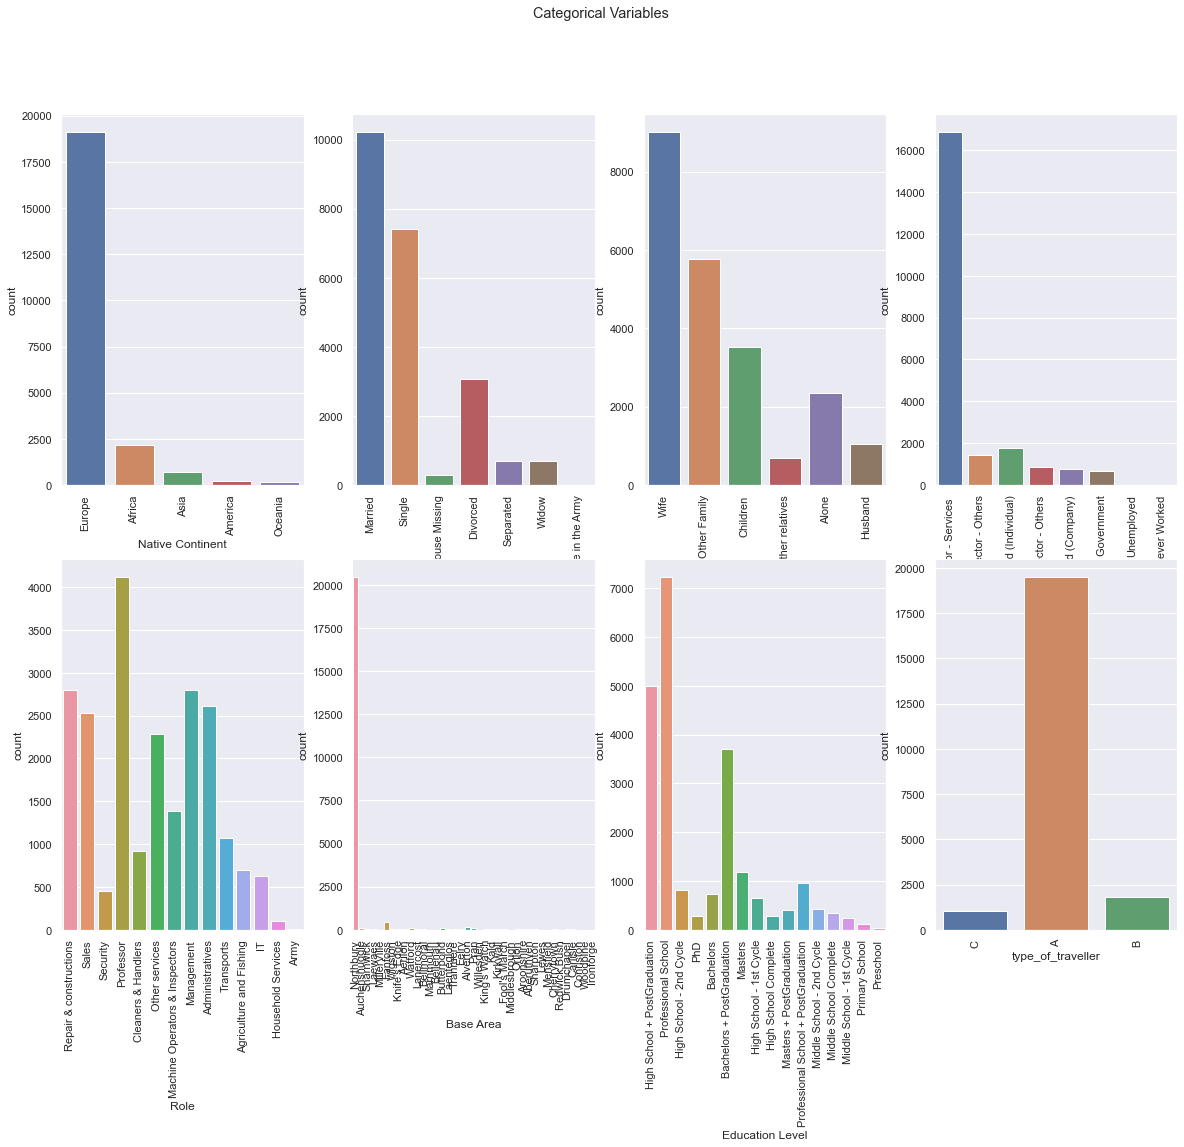

In [236]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 15))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features):
    g = sns.countplot(train[feat], ax=ax)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

title = "Categorical Variables"
plt.suptitle(title)


plt.show()

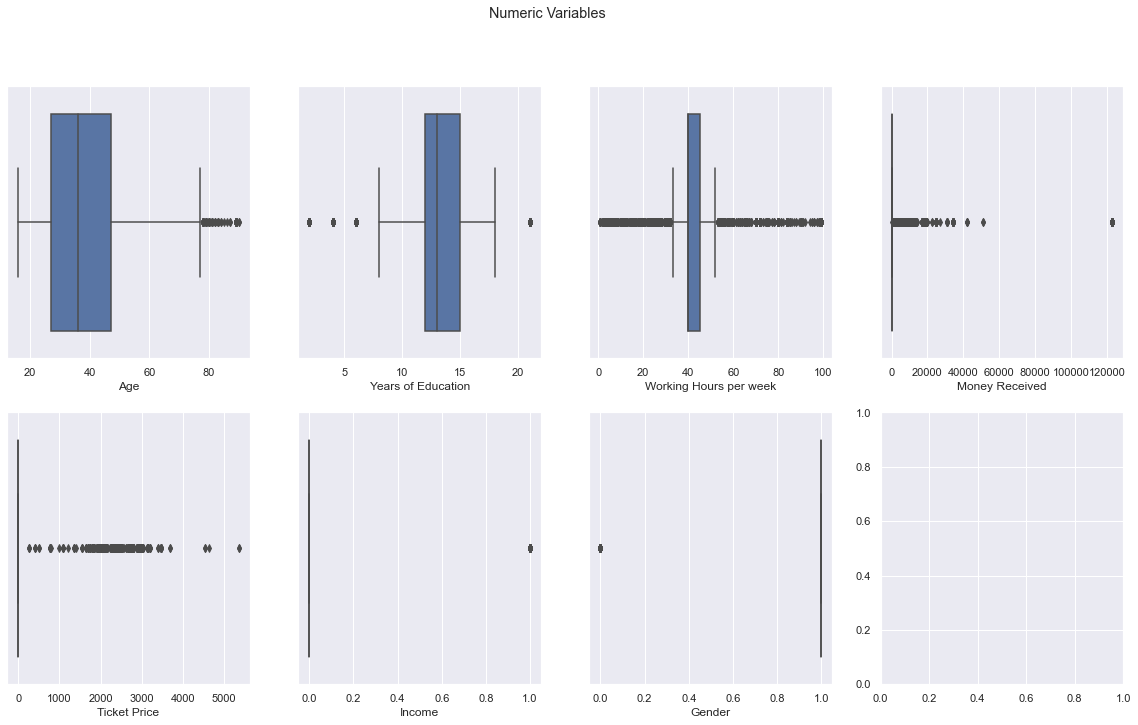

In [237]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables"

plt.suptitle(title)

plt.show()

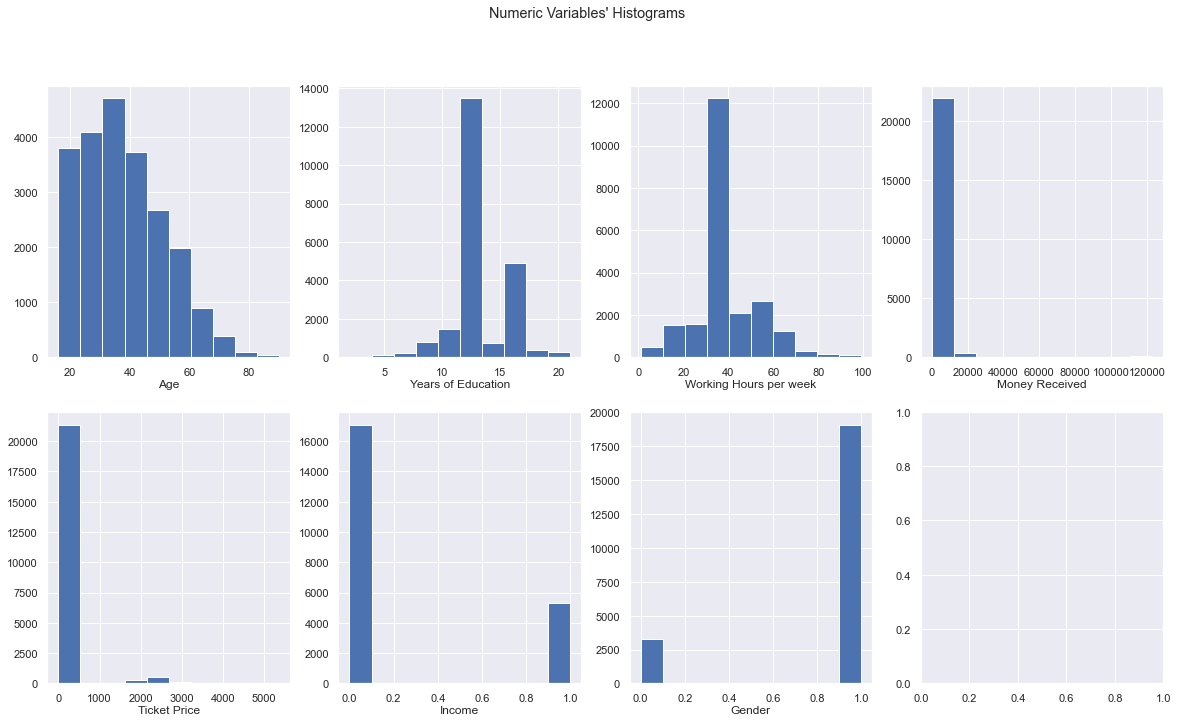

In [238]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

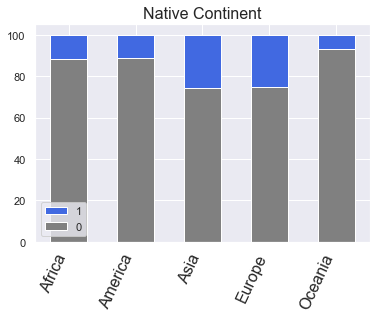

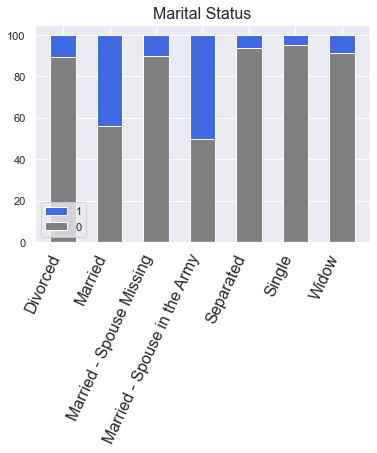

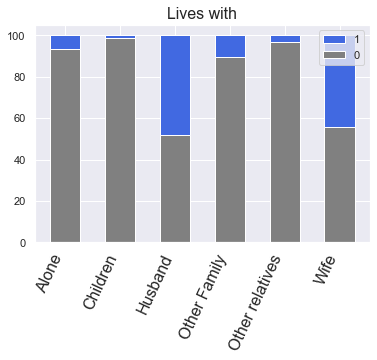

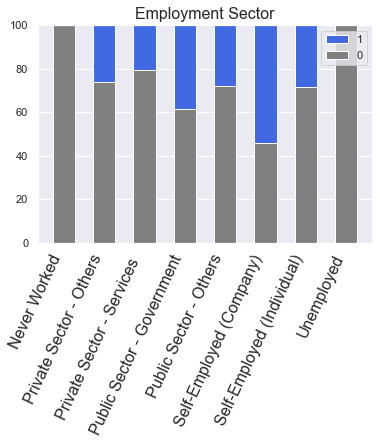

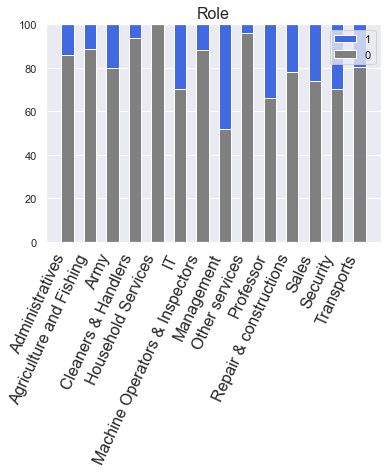

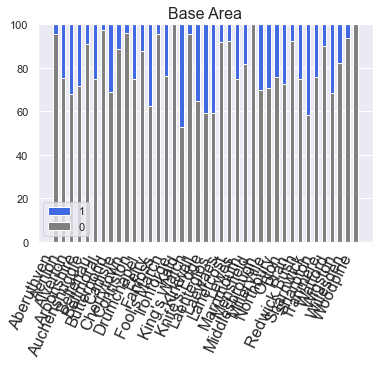

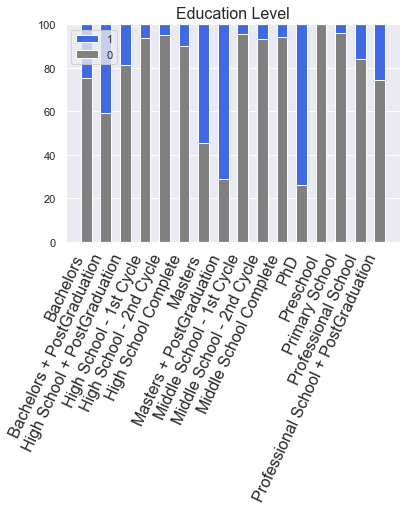

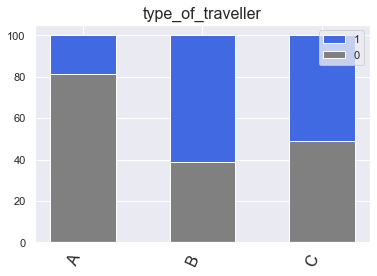

In [239]:
for feature in non_metric_features:
    cont_tab = pd.crosstab(train[feature], train['Income'], margins = True)
    categories = cont_tab.index[:-1]
    obs_pct = np.array([(np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values))*100, 
                        (np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values))*100])
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="royalblue")
    plt.legend((p2[0], p1[0]), ('1', '0'))
    plt.title(feature, size = 16)
    plt.xticks(rotation=65, size = 16,ha = 'right')
    plt.show()

In [240]:
correlation = train.corr()
correlation

,Age,Years of Education,Working Hours per week,Money Received,Ticket Price,Income,Gender
Age,1.000000,0.035223,0.064852,0.072679,0.055776,0.233171,0.317932
Years of Education,0.035223,1.000000,0.138516,0.123015,0.084810,0.333089,-0.020930
Working Hours per week,0.064852,0.138516,1.000000,0.075471,0.052959,0.219890,0.179823
Money Received,0.072679,0.123015,0.075471,1.000000,-0.031330,0.221440,0.039856
Ticket Price,0.055776,0.084810,0.052959,-0.031330,1.000000,0.155890,0.040567
Income,0.233171,0.333089,0.219890,0.221440,0.155890,1.000000,0.194957
Gender,0.317932,-0.020930,0.179823,0.039856,0.040567,0.194957,1.000000


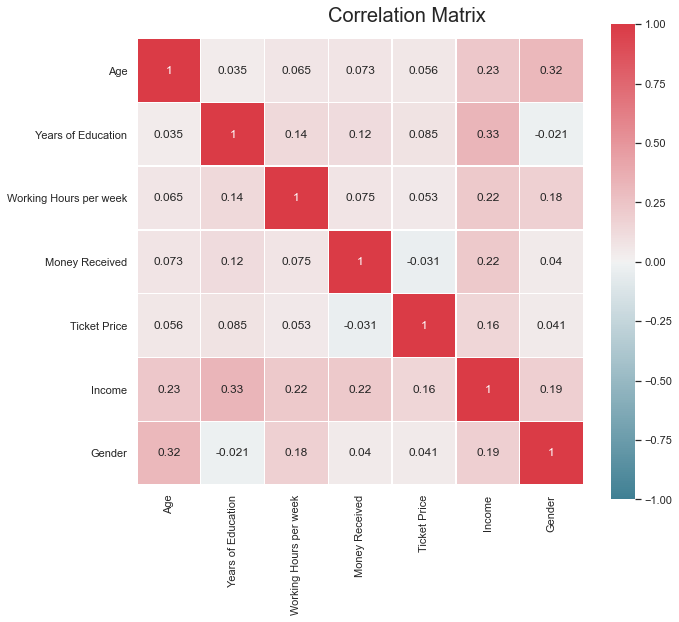

In [241]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation, annot = correlation.values,cmap=sns.diverging_palette(220, 10, as_cmap=True), 
             vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

There are no alarming correlations between the rating variables. We can also see that the one that is most correlated with the dependent variable is Years of Education.

# Outlier Removal

First we tried to remove outliers by applying the IQR method.

In [242]:
#q25 = train.quantile(.25)
#q75 = train.quantile(.75)
#iqr = (q75 - q25)

 

#upper_lim = q75 + 1.5 * iqr
#lower_lim = q25 - 1.5 * iqr

 

#filters2 = []
#for metric in metric_features:
    #llim = lower_lim[metric]
    #ulim = upper_lim[metric]
    #filters2.append(train[metric].between(llim, ulim, inclusive=True))


#filters2 = pd.Series(np.all(filters2,0))

#print(filters2.value_counts())
#print('Percentage of data kept after removing outliers:', filters2.value_counts()[1] / train.shape[0], 4)

As we can see by using the IQR method we would lose more than 50% of our data, so we decide to take out the outliers by hand.

In [243]:
#hand made outliers
filters1 = (

    
    (train['Years of Education']>=4)
    &
    (train['Years of Education']<=20)
    &
    (train['Money Received']<120000)

   
)
train1 = train[filters1]
print('Percentage of data kept after removing outliers:', np.round(train1.shape[0] / train.shape[0], 4))

Percentage of data kept after removing outliers: 0.9809


We removed only the extreme outliers from our data, removing almost 2%.

In [244]:
train = train1

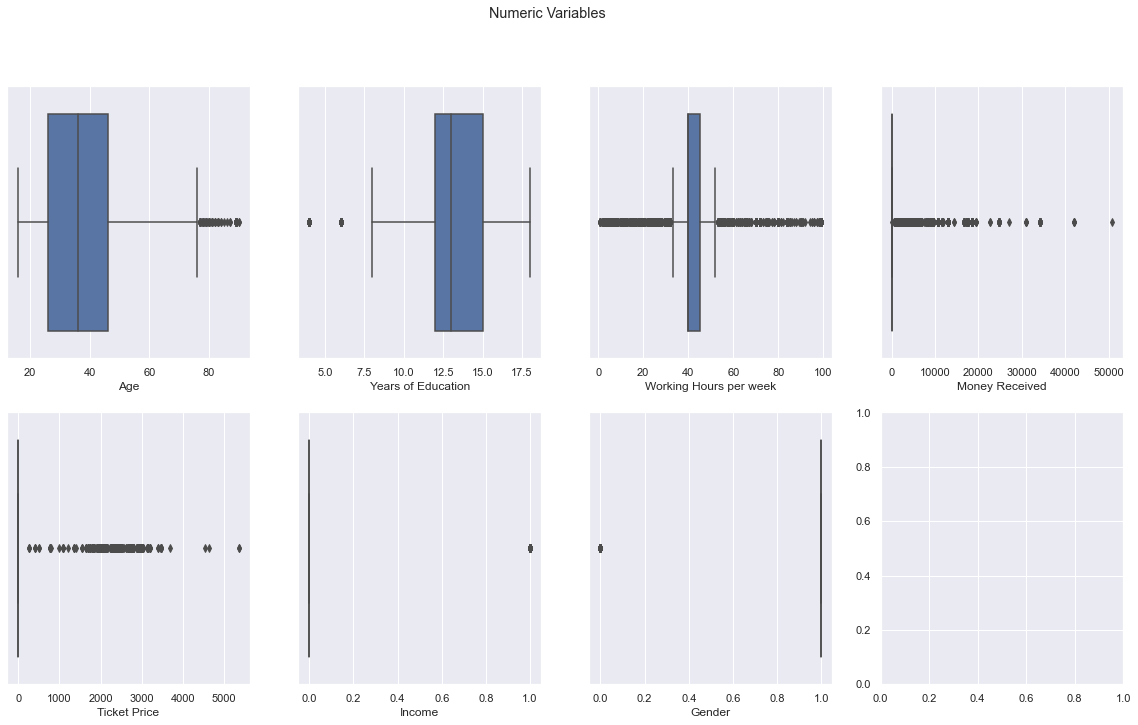

In [245]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables"

plt.suptitle(title)

plt.show()

# One Hot Encoding

We used one hot encoding to represent our categorical variables as integers, so they could be used on our model.

In [246]:
df_train = train.copy()
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features 
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_train[non_metric_features])
ohc_feat_names = ohc.get_feature_names()
df_train = pd.DataFrame(ohc_feat, index=df_train.index, columns=ohc_feat_names)  
train = pd.concat([train.drop(columns=non_metric_features), df_train], axis=1)

Dropping some variables that dont appear in our test set.

In [247]:
train.drop('x5_Carlisle',axis=1,inplace=True)

In [248]:
train.drop('x3_Private Sector - Others',axis=1,inplace=True)

# Dividing the data into X and Y

In [249]:
X = train.drop('Income',axis=1)
y= train['Income']

# Feature Selection

Using Recursive feature elimination with cross-validation, with cv = StratifiedKFold and using 'f1_micro' scoring.

In [250]:
#rfc = RandomForestClassifier(random_state=15)
#rfecv=RFECV(estimator=rfc,step=1,cv=StratifiedKFold(10),scoring='f1_micro')
#rfecv.fit(X,y)

Next step is to see the best number of features to use and remove the non picked variables from our dataset.

In [251]:
#print('Optimal number of features: {}'.format(rfecv.n_features_))
#X.drop(X.columns[np.where(rfecv.support_ == False)[0]],axis=1,inplace=True)

In [252]:
#plt.figure()
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score \n of number of selected features")
#plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#plt.grid(True)
#plt.show()

We store the variables from the RFE on the next cell.

In [253]:
#list_of_variablesrfe = X.columns.tolist()
#len(list_of_variablesrfe)


In [254]:
#list_of_variablesrfe

In [255]:
list_of_variablesrfe = ['Age',
 'Years of Education',
 'Working Hours per week',
 'Money Received',
 'Ticket Price',
 'Gender',
 'x0_America',
 'x0_Asia',
 'x0_Europe',
 'x0_Oceania',
 'x1_Married',
 'x1_Married - Spouse Missing',
 'x1_Married - Spouse in the Army',
 'x1_Separated',
 'x1_Single',
 'x1_Widow',
 'x2_Children',
 'x2_Husband',
 'x2_Other Family',
 'x2_Other relatives',
 'x2_Wife',
 'x3_Private Sector - Services ',
 'x3_Public Sector - Government',
 'x3_Public Sector - Others',
 'x3_Self-Employed (Company)',
 'x3_Self-Employed (Individual)',
 'x4_Agriculture and Fishing',
 'x4_Cleaners & Handlers',
 'x4_Household Services',
 'x4_IT',
 'x4_Machine Operators & Inspectors',
 'x4_Management',
 'x4_Other services',
 'x4_Professor',
 'x4_Repair & constructions',
 'x4_Sales',
 'x4_Security',
 'x4_Transports',
 'x5_Aerilon',
 'x5_Alverton',
 'x5_Aroonshire',
 'x5_Butterpond',
 'x5_Cherrytown',
 'x5_Eelry',
 'x5_Fanfoss',
 "x5_Fool's March",
 "x5_King's Watch",
 'x5_Kirkwall',
 "x5_Knife's Edge",
 'x5_Laenteglos',
 'x5_Laewaes',
 'x5_Lanercost',
 'x5_Northbury',
 'x5_Orilon',
 'x5_Pran',
 'x5_Sharnwick',
 'x5_Sharpton',
 'x5_Tranmere',
 'x5_Watford',
 'x5_Wigston',
 'x6_Bachelors + PostGraduation',
 'x6_High School + PostGraduation',
 'x6_High School - 1st Cycle',
 'x6_High School - 2nd Cycle',
 'x6_High School Complete',
 'x6_Masters',
 'x6_Masters + PostGraduation',
 'x6_Middle School - 1st Cycle',
 'x6_Middle School - 2nd Cycle',
 'x6_Middle School Complete',
 'x6_Primary School',
 'x6_Professional School',
 'x6_Professional School + PostGraduation',
 'x7_B',
 'x7_C']

Using Decision Tree classier with max_depth 12, using 'entropy' criterion to check the feature importances.

In [256]:
dt = DecisionTreeClassifier(random_state=15,max_depth = 12,criterion='entropy')
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=15)

In [257]:
fi_col = []
fi = []
for i,column in enumerate(X):
    print('The feature importance for {} is : {}'.format(column,dt.feature_importances_[i]))
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])


The feature importance for Age is : 0.09670686259461429
The feature importance for Years of Education is : 0.1641037101375713
The feature importance for Working Hours per week is : 0.05527850128658812
The feature importance for Money Received is : 0.1719347295021553
The feature importance for Ticket Price is : 0.06700773880763816
The feature importance for Gender is : 0.0017302674707734625
The feature importance for x0_America is : 0.0008988248289347871
The feature importance for x0_Asia is : 0.0010330263024484218
The feature importance for x0_Europe is : 0.0023880533784373325
The feature importance for x0_Oceania is : 0.0
The feature importance for x1_Married is : 0.3530553633564906
The feature importance for x1_Married - Spouse Missing is : 0.0
The feature importance for x1_Married - Spouse in the Army is : 0.0011504715561019513
The feature importance for x1_Separated is : 0.0007907311092387031
The feature importance for x1_Single is : 0.0013065443000365132
The feature importance for

In [258]:
fi_df = zip(fi_col,fi)
fi_df = pd.DataFrame(fi_df,columns = ['Features','Features Importance'])
fi_df = fi_df.sort_values('Features Importance',ascending= False).reset_index().drop('index',axis=1)
fi_df

,Features,Features Importance
0,x1_Married,0.353055
1,Money Received,0.171935
2,Years of Education,0.164104
3,Age,0.096707
4,Ticket Price,0.067008
...,...,...
87,x5_Orilon,0.000000
88,x5_Pran,0.000000
89,x5_Redwick Bush,0.000000
90,x5_Eelry,0.000000


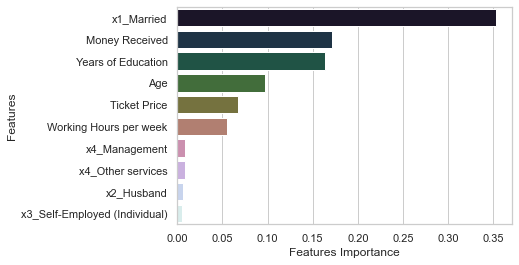

In [259]:
fi_df15 = fi_df[0:10]
sns.set_style('whitegrid')
sns.barplot(fi_df15['Features Importance'], fi_df15['Features'], palette = 'cubehelix', orient = 'h')

In [260]:
fi_df = fi_df[fi_df['Features Importance'] > 0]
list_features = fi_df['Features'].tolist()

In [261]:
list_features

['x1_Married',
 'Money Received',
 'Years of Education',
 'Age',
 'Ticket Price',
 'Working Hours per week',
 'x4_Management',
 'x4_Other services',
 'x2_Husband',
 'x3_Self-Employed (Individual)',
 'x5_Northbury',
 'x3_Private Sector - Services ',
 'x4_Agriculture and Fishing',
 'x4_IT',
 'x2_Other Family',
 'x4_Sales',
 'x0_Europe',
 'x4_Cleaners & Handlers',
 'x3_Public Sector - Government',
 'x2_Children',
 'x2_Wife',
 'x7_B',
 'Gender',
 'x4_Transports',
 'x3_Self-Employed (Company)',
 'x4_Machine Operators & Inspectors',
 'x4_Repair & constructions',
 'x6_High School - 1st Cycle',
 'x1_Single',
 'x6_Professional School',
 'x4_Security',
 'x1_Married - Spouse in the Army',
 'x5_Butterpond',
 'x0_Asia',
 'x0_America',
 'x6_High School + PostGraduation',
 'x5_Sharnwick',
 'x6_Middle School - 2nd Cycle',
 'x3_Public Sector - Others',
 'x1_Separated',
 'x7_C',
 'x4_Professor',
 'x6_Masters + PostGraduation',
 'x6_Bachelors + PostGraduation',
 'x6_High School Complete',
 'x5_Kirkwall',

# Using both methods of Feature Selection 

Now we are gonna check which variables are important on both methods and select those.

In [262]:
list_both = []
for variable in list_of_variablesrfe:
    if variable in list_features:
        list_both.append(variable)
        

In [263]:
X = train[list_both]
X

,Age,Years of Education,Working Hours per week,Money Received,Ticket Price,Gender,x0_America,x0_Asia,x0_Europe,x1_Married,...,x6_High School + PostGraduation,x6_High School - 1st Cycle,x6_High School - 2nd Cycle,x6_High School Complete,x6_Masters,x6_Masters + PostGraduation,x6_Middle School - 2nd Cycle,x6_Professional School,x7_B,x7_C
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
12486,44,13,40,0,2273,1,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12487,41,12,40,0,0,1,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12488,38,12,46,0,2321,1,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12489,62,11,37,5395,0,1,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12491,23,15,30,0,0,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34881,24,12,40,0,0,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34882,22,12,35,0,0,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34883,25,17,40,2674,0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Dividing the data into Train and Test

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,test_size = 0.2,random_state=15,shuffle=True,stratify=y)

# Standardization of the data

Variables come in many different scales, Normalization is about adjusting values measured on different scales to a common scale.

In [265]:
#norm = MinMaxScaler().fit(X_train)
#X_train = norm.transform(X_train)
#X_test= norm.transform(X_test)

In [266]:
#scale = StandardScaler().fit(X_train)
#X_train = scale.transform(X_train)
#X_test  = scale.transform(X_test)

In [267]:
# Create a RobustScaler instanceand fit to your train data
robust = RobustScaler().fit(X_train,X_test)
# Transform your train data by applying the scale obtained in the previous command
X_train = robust.transform(X_train)
# Transform your test data by applying the scale obtained in the first command
X_test = robust.transform(X_test)

# Functions

In [268]:
def avg_score(model):
    # apply kfold
    kf = KFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    for train_index, test_index in kf.split(X):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = f1_score(y_train,model.predict(X_train),average='micro')
        # check the mean accuracy for the test
        value_test = f1_score(y_test,model.predict(X_test),average='micro')
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test)

In [269]:
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test
        count+=1
    return df

# Unbalanced Data?

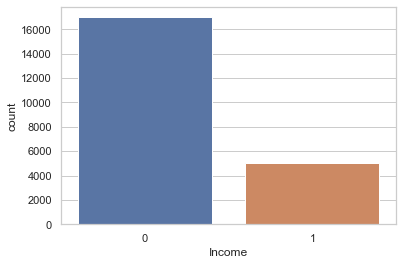

In [270]:
sns.set_style('whitegrid')
sns.countplot(x='Income',data= train)

As we saw in visualization there was a discrepancy between the people that had the salary above the mean and those that did not.

In [271]:
train['Income'].value_counts()

0    16981
1     4991
Name: Income, dtype: int64

We have to deal with the unbalanced data, so we decided to use Smote to deal with it.

In [272]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Models With No Parameters

First we tried some models(LG,RF,AB,GB) with no parameters to see how they perform.

# Logistic Regression No Parameters

In [273]:
#logmodel1 = LogisticRegression(random_state=10).fit(X_train,y_train)

In [274]:
#predictionsLR = logmodel1.predict(X_test)

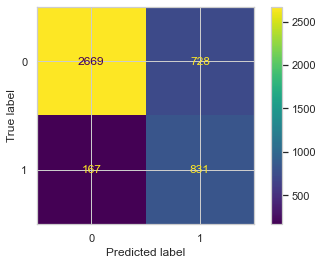

In [275]:
#cm = confusion_matrix(y_test,predictionsLR)
#cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
#plot_confusion_matrix(logmodel1,X_test,y_test)
#plt.show()

In [276]:
#df1 = pd.DataFrame(columns = ['Time','Train','Test'],index=['LogRegression'])
#log_result1 = show_results(df1,logmodel1)
#log_result1

,Time,Train,Test
LogRegression,0.378+/-0.06,0.829+/-0.01,0.829+/-0.01


In [277]:
#log_result = float(log_result1['Test'][0][0:5])
#log_result

0.829

# Random Forest No Parameters

In [278]:
#modelRF1 =RandomForestClassifier(random_state = 10,criterion='entropy').fit(X_train,y_train)

In [279]:
#predictionsRF1 = modelRF1.predict(X_test)

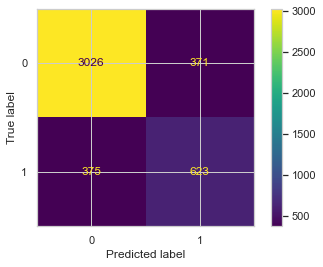

In [280]:
#cm = confusion_matrix(y_test,predictionsRF1)
#cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
#plot_confusion_matrix(modelRF1,X_test,y_test)
#plt.show()

In [281]:
#df2 = pd.DataFrame(columns = ['Time','Train','Test'],index=['RandomForest'])
#rf_result1=show_results(df2,modelRF1)
#rf_result1

,Time,Train,Test
RandomForest,2.725+/-0.39,0.981+/-0.0,0.85+/-0.01


In [282]:
#rf_result = float(rf_result1['Test'][0][0:4])
#rf_result

0.85

# AdaBoost No Parameters

In [283]:
#ab1 = AdaBoostClassifier(random_state = 10).fit(X_train, y_train)

In [284]:
#predictionsab = ab1.predict(X_test)

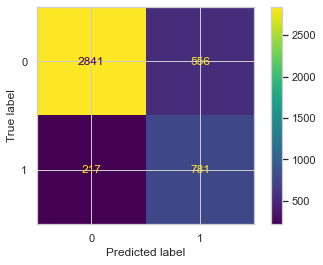

In [285]:
#cm = confusion_matrix(y_test,predictionsab)
#cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
#plot_confusion_matrix(ab1,X_test,y_test)
#plt.show()

In [286]:
#df3 = pd.DataFrame(columns = ['Time','Train','Test'],index=['AdaBoost'])
#ab_result1 = show_results(df3,ab1)
#ab_result1

,Time,Train,Test
AdaBoost,1.34+/-0.15,0.861+/-0.0,0.859+/-0.01


In [287]:
#ab_result = float(ab_result1['Test'][0][0:5])
#ab_result

0.859

# Gradient Boosting No Parameters

In [288]:
#gb1 = GradientBoostingClassifier(random_state=15).fit(X_train, y_train)

In [289]:
#predictionsgb = gb1.predict(X_test)

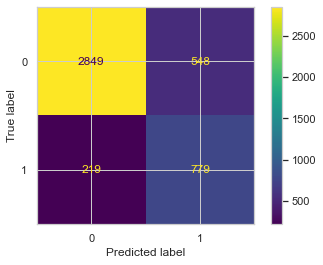

In [290]:
#cm = confusion_matrix(y_test,predictionsab)
#cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
#plot_confusion_matrix(gb1,X_test,y_test)
#plt.show()

In [291]:
#df4 = pd.DataFrame(columns = ['Time','Train','Test'],index=['GradientBoost'])
#gb_result1 = show_results(df4,gb1)
#gb_result1

,Time,Train,Test
GradientBoost,3.73+/-0.41,0.869+/-0.0,0.864+/-0.01


In [292]:
#gb_result = float(gb_result1['Test'][0][0:5])
#gb_result

0.864

In [293]:
#pdList = [log_result1,rf_result1,ab_result1,gb_result1]

In [294]:
#f1_scores = pd.concat(pdList)
#f1_scores

,Time,Train,Test
LogRegression,0.378+/-0.06,0.829+/-0.01,0.829+/-0.01
RandomForest,2.725+/-0.39,0.981+/-0.0,0.85+/-0.01
AdaBoost,1.34+/-0.15,0.861+/-0.0,0.859+/-0.01
GradientBoost,3.73+/-0.41,0.869+/-0.0,0.864+/-0.01


# Results with raw models

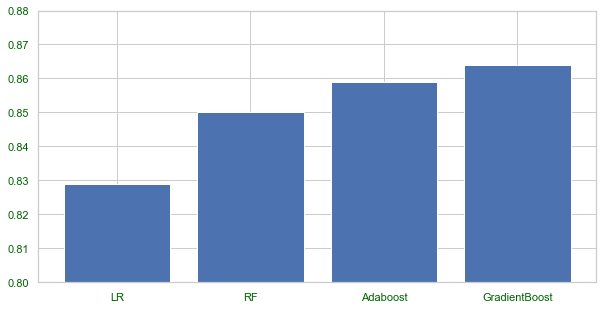

In [295]:
#fig = plt.figure(figsize = (10,5))
#accuracies = [log_result, ab_result, rf_result,gb_result]
#models = ['LR', 'Adaboost', 'RF', 'GradientBoost']
#data_tuples = list(zip(models,accuracies))
#data = pd.DataFrame(data_tuples)
#data = data.sort_values(1)
#plt.bar(data[0], data[1])
#plt.xticks(color='darkgreen')
#plt.yticks(color='darkgreen')
#plt.ylim(0.80,0.88)
#plt.grid(True)
#plt.show()

We can see that Gradient Boosting did get the better results, so it's the one that we are gonna give more attention.

# Models With Parameters

# Logistic Regression Model

In [296]:
#logmodel = LogisticRegression(random_state=15,max_iter = 1000,C = 69.51927961775606).fit(X_train,y_train)

In [297]:
#predictionslr = logmodel.predict(X_test)

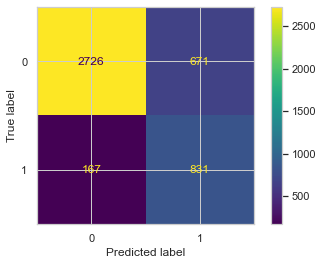

In [298]:
#cm = confusion_matrix(y_test,predictionslr)
#cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
#plot_confusion_matrix(logmodel,X_test,y_test)
#plt.show()

In [299]:
#df = pd.DataFrame(columns = ['Time','Train','Test'],index=['LogRegression'])
#log_result = show_results(df,logmodel)
#log_result

,Time,Train,Test
LogRegression,4.119+/-0.16,0.853+/-0.0,0.851+/-0.01


In [300]:
#log_result = float(log_result['Test'][0][0:4])
#log_result

0.85

# Random Forest Model

In [301]:
#modelRF = RandomForestClassifier(random_state = 10,criterion='entropy',max_depth=10,oob_score=True).fit(X_train,y_train)

In [302]:
#predictionsrf = modelRF.predict(X_test)

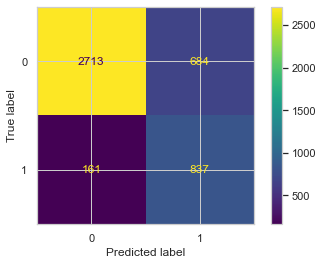

In [303]:
#cm = confusion_matrix(y_test,predictionsrf)
#cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
#plot_confusion_matrix(modelRF,X_test,y_test)
#plt.show()

In [304]:
#df = pd.DataFrame(columns = ['Time','Train','Test'],index=['RandomForest'])
#rf_result=show_results(df,modelRF)
#rf_result

,Time,Train,Test
RandomForest,2.059+/-0.12,0.866+/-0.0,0.857+/-0.01


In [305]:
#rf_result = float(rf_result['Test'][0][0:5])
#rf_result

0.857

# AdaBoost Model

In [306]:
#ab = AdaBoostClassifier(random_state = 10,n_estimators=100,learning_rate=1.5).fit(X_train, y_train)

In [307]:
#predictionsab = ab.predict(X_test)

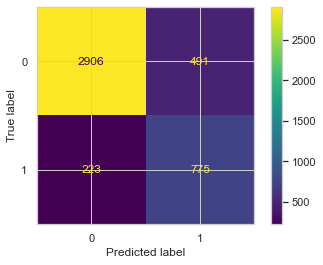

In [308]:
#cm = confusion_matrix(y_test,predictionsab)
#cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
#plot_confusion_matrix(ab,X_test,y_test)
#plt.show()

In [309]:
#df = pd.DataFrame(columns = ['Time','Train','Test'],index=['AdaBoost'])
#ab_result = show_results(df,ab)
#ab_result

,Time,Train,Test
AdaBoost,3.289+/-0.42,0.867+/-0.0,0.863+/-0.01


In [310]:
#ab_result = float(ab_result['Test'][0][0:5])
#ab_result

0.863

# Gradient Boosting Model

In [311]:
gb = GradientBoostingClassifier(random_state=15,learning_rate=0.2,max_depth=9,n_estimators=90,min_samples_split=1100).fit(X_train, y_train)

In [312]:
predictionsgb = gb.predict(X_test)

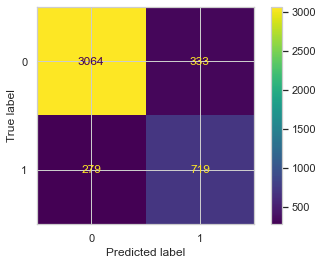

In [313]:
cm = confusion_matrix(y_test,predictionsgb)
cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(gb,X_test,y_test)
plt.show()

In [314]:
df = pd.DataFrame(columns = ['Time','Train','Test'],index=['GradientBoost'])
gb_result = show_results(df,gb)
gb_result

,Time,Train,Test
GradientBoost,10.393+/-0.98,0.888+/-0.0,0.874+/-0.01


In [315]:
gb_result = float(gb_result['Test'][0][0:5])
gb_result

0.874

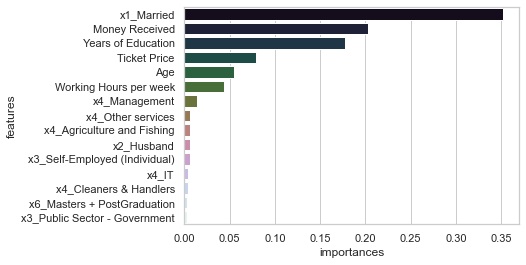

In [316]:
importances = gb.feature_importances_
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)
data15 = data[0:15]
sns.barplot(data15['importances'], data15['features'], palette = 'cubehelix', orient = 'h')

# Param search grid GBmodel

As Gradient Boosting was our best model we decided to do a more advanced parameter tuning with search grid.

In [317]:
#param_test1 = {'n_estimators':range(70,401,10)}
#gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(random_state=10,learning_rate=0.2), 
#param_grid = param_test1, scoring='f1_micro',n_jobs=4,iid=False, cv=5)
#gsearch1.fit(X_train,y_train)
#gsearch1.best_params_, gsearch1.best_score_

the best n_estimators for learning rate 0.2 = 90

In [318]:
#param_test2 = { 'max_depth':range(1,12,1)}
#gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2,n_estimators=90,random_state=10), 
#param_grid = param_test2, scoring='f1_micro',n_jobs=4,iid=False, cv=5)
#gsearch2.fit(X_train,y_train)
#gsearch2.best_params_, gsearch2.best_score_

the best max_depth for learning_rate 0.2 and n_estimators 90 = 9

In [319]:
#param_test3 = {'min_samples_split':range(100,1201,100)}
#gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2,n_estimators=90,max_depth=9,random_state=10), 
#param_grid = param_test3, scoring='f1_micro',n_jobs=4,iid=False, cv=5)
#gsearch3.fit(X_train,y_train)
#gsearch3.best_params_, gsearch3.best_score_

the best min_sample_split for learning_rate 0.2, n_estimators 90 and max_depth 9 = 1000

# Stacking


In [320]:
#estimators = [('modelRF', RandomForestClassifier(random_state = 10,criterion='entropy',max_depth=10,oob_score=True)),('gb', GradientBoostingClassifier(random_state=10,learning_rate=0.2,max_depth=9,n_estimators=90,min_samples_split=1000)),('ab',AdaBoostClassifier(random_state = 10,n_estimators=100,learning_rate=1.5))]
#sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=10,class_weight='balanced'),stack_method = 'predict')

In [321]:
#sc.fit(X_train, y_train)

StackingClassifier(estimators=[('modelRF',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       oob_score=True,
                                                       random_state=10)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.2,
                                                           max_depth=9,
                                                           min_samples_split=1000,
                                                           n_estimators=90,
                                                           random_state=10)),
                               ('ab',
                                AdaBoostClassifier(learning_rate=1.5,
                                                   n_estimators=100,
                                                   random_state=1

In [322]:
#df = pd.DataFrame(columns = ['Time','Train','Test'],index=['Stacking'])
#sc_result = show_results(df,sc)
#sc_result

,Time,Train,Test
Stacking,62.86+/-10.69,0.878+/-0.0,0.869+/-0.01


In [323]:
#predictionssc = sc.predict(X_test)

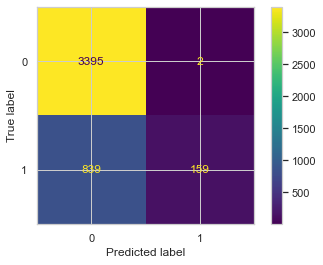

In [324]:
#cm = confusion_matrix(y_test,predictionssc)
#cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
#plot_confusion_matrix(sc,X_test,y_test)
#plt.show()

In [325]:
#sc_result = float(sc_result['Test'][0][0:4])
#sc_result

0.86

# Full Model Results

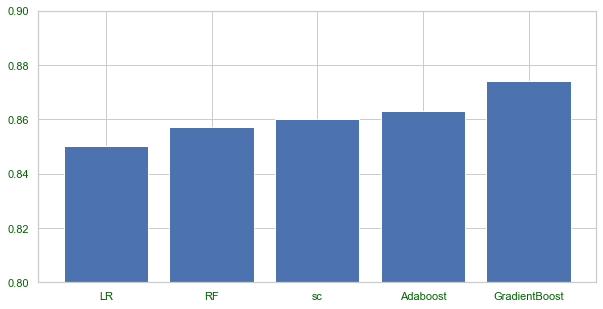

In [326]:
#fig = plt.figure(figsize = (10,5))
#accuracies = [log_result, ab_result, rf_result,gb_result,sc_result]
#models = ['LR', 'Adaboost', 'RF', 'GradientBoost','sc']
#data_tuples = list(zip(models,accuracies))
#data = pd.DataFrame(data_tuples)
#data = data.sort_values(1)
#plt.bar(data[0], data[1])
#plt.xticks(color='darkgreen')
#plt.yticks(color='darkgreen')
#plt.ylim(0.80,0.90)
#plt.show()

# TEST SET

Loading our testset and doing exactly every change we did on the trainset to it.

In [327]:
test = pd.read_excel('Test.xlsx')

In [328]:
test

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price
0,34886,Mr. Dan Kerr,"May 13,2012",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0
1,34887,Miss Olivia Grant,"August 9,2014",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0
2,34888,Mr. Trevor Simpson,"May 23,2020",Europe,Divorced,Other Family,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0
3,34889,Mr. David Clark,"April 15,2016",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Professor,48,0,1827
4,34890,Mr. Gavin Lambert,"April 22,2011",Europe,Married,Wife,Watford,Bachelors,15,Public Sector - Others,Professor,45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,44981,Mr. Victor Cornish,"June 12,2012",Europe,Married,Wife,Northbury,Masters,17,Private Sector - Services,Professor,60,0,2432
10096,44982,Mr. Benjamin Jones,"March 26,2000",Europe,Divorced,Other Family,Northbury,Masters,17,Private Sector - Services,Management,50,122999,0
10097,44983,Miss Jennifer Rampling,"January 28,2022",Europe,Single,Alone,Northbury,High School + PostGraduation,13,Public Sector - Government,Administratives,15,0,0
10098,44984,Miss Kimberly Rampling,"July 22,2024",Europe,Single,Children,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Administratives,40,0,0


In [329]:
#test['logWorkinghours'] = np.log(test['Working Hours per week'])
#test.drop('Working Hours per week',axis=1,inplace=True)

In [330]:
lista_names = []
for n in range(len(test)):
    if 'Mr.' in test['Name'][n]:
        lista_names.append(1)
    else:
        lista_names.append(0)
        
test['Gender'] = lista_names

In [331]:
bissexto=test[test["Birthday"].str.contains("February 29")]
listbiss=np.arange(1920, 2048, 4).tolist()
listbiss=map(str,listbiss)
bissexto["ano"]=bissexto["Birthday"].astype(str).str[-4:]
bissexto=bissexto[~bissexto["ano"].isin(listbiss)]
lis=bissexto.index
for i in lis:
    test["Birthday"][i]=test["Birthday"][i].replace("29","28")
from datetime import datetime
for i in test.index:
    test["Birthday"][i]=datetime.strptime(test["Birthday"][i], ' %B %d,%Y')
test["Birthday"] =  pd.to_datetime(test["Birthday"])
test['Birthday'] = (datetime.strptime(" June 30,2048",' %B %d,%Y') - test['Birthday'])/np.timedelta64(1, 'Y')
test["Birthday"]=test["Birthday"].apply(np.floor)
test["Birthday"]=test["Birthday"].astype(int)
test.rename(columns={"Birthday": "Age"},inplace = True)

In [332]:
test.drop('Name',axis=1,inplace=True)

In [333]:
lista_tipos = []

for i in range(len(test['Money Received'])):
    if test['Money Received'][i] == 0:
        if test['Ticket Price'][i] == 0:
            lista_tipos.append('A')
        if test['Ticket Price'][i] > 0:
            lista_tipos.append('C')
    else:
        lista_tipos.append('B')
test['type_of_traveller'] = lista_tipos

In [334]:
non_metric_features = ["Native Continent", "Marital Status", "Lives with", "Employment Sector",'Role','Base Area','Education Level','type_of_traveller']
metric_features = test.columns.drop(non_metric_features).to_list()

In [335]:
modes = test[non_metric_features].mode().loc[0]
modes

Native Continent                         Europe
Marital Status                          Married
Lives with                                 Wife
Employment Sector    Private Sector - Services 
Role                     Repair & constructions
Base Area                             Northbury
Education Level             Professional School
type_of_traveller                             A
Name: 0, dtype: object

In [336]:
test['Role'].replace({'?': modes['Role']}, inplace=True)
test["Employment Sector"].replace({'?': modes['Employment Sector']}, inplace=True)
test["Base Area"].replace({'?': modes['Base Area']}, inplace=True)

In [337]:
lista_sector = []
for h in range(len(test)):
    if 'Private' in test['Employment Sector'][h]:
        lista_sector.append(1)
    else:
        lista_sector.append(0)
        
test['Sector'] = lista_sector

In [338]:
test = test.set_index('CITIZEN_ID')

In [339]:
non_metric_features = ["Native Continent", "Marital Status", "Lives with", "Employment Sector",'Role','Base Area','Education Level','type_of_traveller','Sector']
metric_features = test.columns.drop(non_metric_features).to_list()

In [340]:
df_test = test.copy()
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_test[non_metric_features])
ohc_feat_names = ohc.get_feature_names()
df_test = pd.DataFrame(ohc_feat, index=df_test.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
df_test

,x0_America,x0_Asia,x0_Europe,x0_Oceania,x1_Married,x1_Married - Spouse Missing,x1_Married - Spouse in the Army,x1_Separated,x1_Single,x1_Widow,...,x6_Middle School - 2nd Cycle,x6_Middle School Complete,x6_PhD,x6_Preschool,x6_Primary School,x6_Professional School,x6_Professional School + PostGraduation,x7_B,x7_C,x8_1
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
34886,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34887,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34888,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
34889,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
34890,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44981,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
44982,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
44983,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [341]:
# Reassigning df to contain ohc variables
test = pd.concat([test.drop(columns=non_metric_features), df_test], axis=1)
test.head()

,Age,Years of Education,Working Hours per week,Money Received,Ticket Price,Gender,x0_America,x0_Asia,x0_Europe,x0_Oceania,...,x6_Middle School - 2nd Cycle,x6_Middle School Complete,x6_PhD,x6_Preschool,x6_Primary School,x6_Professional School,x6_Professional School + PostGraduation,x7_B,x7_C,x8_1
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
34886,36,16,40,0,0,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34887,33,16,36,0,0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34888,28,13,50,12940,0,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
34889,32,12,48,0,1827,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
34890,37,15,45,0,0,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [342]:
X_test = test.copy()

In [343]:
X_test = X_test[list_both]

# Predictions with our best model (Gradient Boost)

In [344]:
predictions=gb.predict(X_test)


In [345]:
predictions

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [346]:
datapredictions=pd.DataFrame(predictions,test.index)
datapredictions=datapredictions.reset_index()

In [347]:
datapredictions[0].value_counts()

0    8100
1    2000
Name: 0, dtype: int64

In [348]:
datapredictions = datapredictions.set_index('CITIZEN_ID')

In [349]:
datapredictions.rename(columns={0: "Income"},inplace = True)

Final dataframe with the predictions and the Citizens_id

In [350]:
datapredictions

,Income
CITIZEN_ID,
34886,1
34887,0
34888,1
34889,0
34890,0
...,...
44981,1
44982,1
44983,0


# Predictions to CSV

In [351]:
datapredictions.to_csv("GROUP36_Version_62.csv")